<a href="https://colab.research.google.com/github/yydevelop/study/blob/main/fx_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install twelvedata websocket

     |████████████████████████████████| 44 kB 979 kB/s 
     |████████████████████████████████| 195 kB 9.8 MB/s 
     |████████████████████████████████| 5.8 MB 31.9 MB/s 
     |████████████████████████████████| 251 kB 58.6 MB/s 
  Created wheel for websocket: filename=websocket-0.2.1-py3-none-any.whl size=192132 sha256=ec7b5b19eaf03fdaddf94b575f1aaa45953e043c10a568816ff2b9e8581d49aa
  Stored in directory: /root/.cache/pip/wheels/e2/9b/2b/6324f465ec5543e33a31c2692c01c1760173bbb98b37dbaee8
Successfully built websocket


In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from twelvedata import TDClient
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [7]:
apikey = 'c522ac31c5ab4653bb781777f8bccbad'
td = TDClient(apikey = apikey)

# ヒストリカルデータを取得
def get_historical_data(symbol):
    interval = '5min' # 時間軸
    outputsize = 2000 # 最大取得件数
    start_date = '2021-11-26 08:00' # 取得開始日（「yyyy-MM-dd」 or 「yyyy-MM-dd hh:mm:ss」）
    end_date = '2021-11-27 07:59' # 取得終了日（「yyyy-MM-dd」 or 「yyyy-MM-dd hh:mm:ss」）
    timezone = 'Asia/Tokyo' # タイムゾーン

    res = td.time_series(symbol = symbol, interval= interval, outputsize = outputsize, start_date = start_date, end_date = end_date, timezone = timezone).as_json()

    df = pd.DataFrame(res).iloc[::-1].set_index('datetime').astype(float)
    df = df[df.index >= start_date]
    df.index = pd.to_datetime(df.index)

    return df

# 各通貨の対数変化率を算出
def calc_logarithmic_change_rates(symbols):
    logarithmic_change_rates = []

    for symbol in symbols:
        print(f'Fetching {symbol} ...')

        historical_data = get_historical_data(symbol)
        logarithmic_change_rate = np.log(historical_data['close'] / historical_data['close'][0])

        logarithmic_change_rates.append(logarithmic_change_rate)

        time.sleep(8) # 無料プランにおけるTwelve DataのAPIコールは1分間に8件までなので間隔を空ける

    print('\n Finished !')

    return logarithmic_change_rates

In [14]:
# 通貨ペアを指定
symbols = [
    'EUR/USD', 'EUR/GBP', 'EUR/AUD', 'EUR/NZD', 'EUR/CAD', 'EUR/CHF', 'EUR/NOK', 'EUR/JPY',
    'GBP/USD', 'GBP/AUD', 'GBP/NZD', 'GBP/CAD', 'GBP/CHF', 'GBP/NOK', 'GBP/JPY',
    'AUD/USD', 'AUD/NZD', 'AUD/CAD', 'AUD/CHF', 'AUD/NOK', 'AUD/JPY',
    'NZD/USD', 'NZD/CAD', 'NZD/CHF', 'NZD/NOK', 'NZD/JPY',
    'CHF/USD', 'CHF/CAD', 'CHF/NOK', 'CHF/JPY',
    'NOK/USD', 'NOK/CAD', 'NOK/JPY',
    'USD/CAD', 'USD/JPY',
    'CAD/JPY',
]

eur_usd,eur_gbp,eur_aud,eur_nzd,eur_cad,eur_chf,eur_nok,eur_jpy,gbp_usd,gbp_aud,gbp_nzd,gbp_cad,gbp_chf,gbp_nok,gbp_jpy,aud_usd,aud_nzd,aud_cad,aud_chf,aud_nok,aud_jpy,nzd_usd,nzd_cad,nzd_chf,nzd_nok,nzd_jpy,chf_usd,chf_cad,chf_nok,chf_jpy,nok_usd,nok_cad,nok_jpy,usd_cad,usd_jpy,cad_jpy = calc_logarithmic_change_rates(symbols)



Fetching EUR/USD ...
Fetching EUR/GBP ...
Fetching EUR/AUD ...
Fetching EUR/NZD ...
Fetching EUR/CAD ...
Fetching EUR/CHF ...
Fetching EUR/NOK ...
Fetching EUR/JPY ...
Fetching GBP/USD ...
Fetching GBP/AUD ...
Fetching GBP/NZD ...
Fetching GBP/CAD ...
Fetching GBP/CHF ...
Fetching GBP/NOK ...
Fetching GBP/JPY ...
Fetching AUD/USD ...
Fetching AUD/NZD ...
Fetching AUD/CAD ...
Fetching AUD/CHF ...
Fetching AUD/NOK ...
Fetching AUD/JPY ...
Fetching NZD/USD ...
Fetching NZD/CAD ...
Fetching NZD/CHF ...
Fetching NZD/NOK ...
Fetching NZD/JPY ...
Fetching CHF/USD ...
Fetching CHF/CAD ...
Fetching CHF/NOK ...
Fetching CHF/JPY ...
Fetching NOK/USD ...
Fetching NOK/CAD ...
Fetching NOK/JPY ...
Fetching USD/CAD ...
Fetching USD/JPY ...
Fetching CAD/JPY ...

 Finished !


In [15]:
# 通貨単体の強さを算出
eur = (eur_usd + eur_gbp + eur_aud + eur_nzd + eur_cad + eur_chf + eur_nok + eur_jpy).fillna(method = "ffill")
gbp = ((eur_gbp * (-1)) + gbp_usd + gbp_aud + gbp_nzd + gbp_cad + gbp_chf + gbp_nok + gbp_jpy).fillna(method = "ffill")
aud = ((eur_aud * (-1)) + (gbp_aud * (-1)) + aud_usd + aud_nzd + aud_cad + aud_chf + aud_nok + aud_jpy).fillna(method = "ffill")
nzd = ((eur_nzd * (-1)) + (gbp_nzd * (-1)) + (aud_nzd * (-1)) + nzd_usd + nzd_cad + nzd_chf + nzd_nok + nzd_jpy).fillna(method = "ffill")
chf = ((eur_chf * (-1)) + (gbp_chf * (-1)) + (aud_chf * (-1)) + (nzd_chf * (-1)) + chf_usd + chf_cad + chf_nok + chf_jpy).fillna(method = "ffill")
nok = ((eur_nok * (-1)) + (gbp_nok * (-1)) + (aud_nok * (-1)) + (nzd_nok * (-1)) + (chf_nok * (-1)) + nok_usd + nok_cad + nok_jpy).fillna(method = "ffill")
usd = ((eur_usd * (-1)) + (gbp_usd * (-1)) + (aud_usd * (-1)) + (nzd_usd * (-1)) + (chf_usd * (-1)) + (nok_usd * (-1)) + usd_cad + usd_jpy).fillna(method = "ffill")
cad = ((eur_cad * (-1)) + (gbp_cad * (-1)) + (aud_cad * (-1)) + (nzd_cad * (-1)) + (chf_cad * (-1)) + (nok_cad * (-1)) + (usd_cad * (-1)) + cad_jpy).fillna(method = "ffill")
jpy = ((eur_jpy * (-1)) + (gbp_jpy * (-1)) + (aud_jpy * (-1)) + (nzd_jpy * (-1)) + (chf_jpy * (-1)) + (nok_jpy * (-1)) + (usd_jpy * (-1)) + (cad_jpy * (-1))).fillna(method = "ffill")


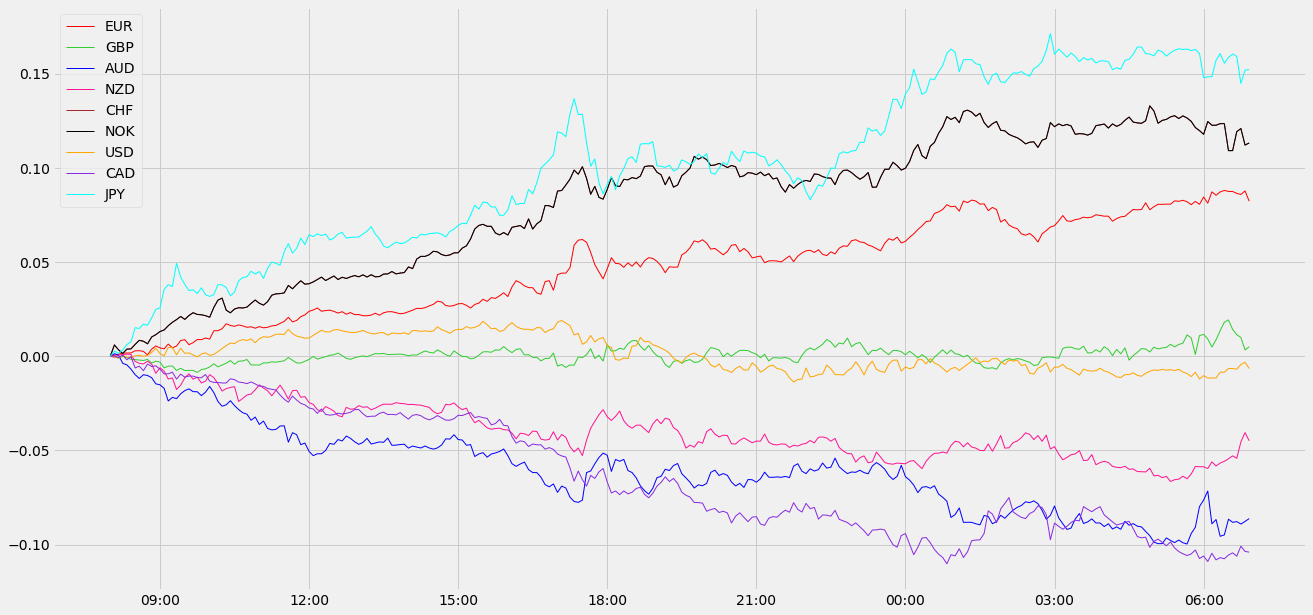

In [17]:
# 通貨の強弱関係を描画
fig, ax = plt.subplots()

ax.plot(eur.index, eur, label = 'EUR', color = 'red', linewidth = 1)
ax.plot(gbp.index, gbp, label = 'GBP', color = 'limegreen', linewidth = 1)
ax.plot(aud.index, aud, label = 'AUD', color = 'blue', linewidth = 1)
ax.plot(nzd.index, nzd, label = 'NZD', color = 'deeppink', linewidth = 1)
ax.plot(chf.index, chf, label = 'CHF', color = 'brown', linewidth = 1)
ax.plot(chf.index, chf, label = 'NOK', color = 'black', linewidth = 1)
ax.plot(usd.index, usd, label = 'USD', color = 'orange', linewidth = 1)
ax.plot(cad.index, cad, label = 'CAD', color = 'blueviolet', linewidth = 1)
ax.plot(jpy.index, jpy, label = 'JPY', color = 'aqua', linewidth = 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax.legend()
plt.show()